# HIZLA İLERLEYEN ÇELİK ÇUBUKLARDA YÜZEY BOZULMASI TESPİTİ

### VERİYİ GOOGLE DRİVE DA BENİM HESABIMDAN ÇEKİYORUZ

In [ ]:
!ls '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects'

ls: cannot access '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects': No such file or directory


In [ ]:
!ls '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects/valid/'


ls: cannot access '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects/valid/': No such file or directory


In [ ]:
!ls '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects/train/'


ls: cannot access '/gdrive/MyDrive/Datasets/NEU_metal_surface_defects/train/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = r'/gdrive/Mydrive/Datasets/NEU_metal_surface_defects/'

### GEREKLİ PYHTON KÜTÜPHANELERİ EKLEDİK

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [ ]:
# Northeast üniversitesinden aldığımız datayı drivea ekleyip drivedan çektik.

train_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/train/'
val_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/valid/'
test_path = '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/test/'

In [ ]:
os.listdir(val_path)

['Crazing', 'Pitted', 'Inclusion', 'Rolled', 'Patches', 'Scratches']

In [ ]:
os.listdir(val_path + 'Scratches')

['Sc_115.bmp',
 'Sc_116.bmp',
 'Sc_114.bmp',
 'Sc_113.bmp',
 'Sc_11.bmp',
 'Sc_119.bmp',
 'Sc_12.bmp',
 'Sc_111.bmp',
 'Sc_118.bmp',
 'Sc_117.bmp',
 'Sc_112.bmp',
 'Sc_110.bmp']

In [ ]:
img = imread(val_path + 'Scratches/Sc_111.bmp')

In [ ]:
img.shape

(200, 200)

In [ ]:
img.max(), img.min()

(255, 48)

GRİ RENKLİ GÖRÜNTÜYÜ ADRESİNİ BELİRTEREK ETİKET İŞLEMİNİ YAPMAYA BAŞLIYORUZ

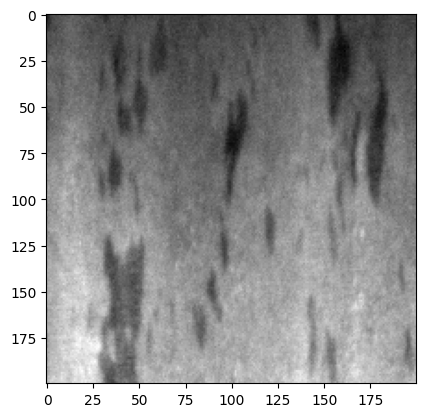

In [ ]:
plt.imshow(imread(val_path + 'Inclusion/In_12.bmp','BMP'), cmap = 'gray')

In [ ]:
len(os.listdir(train_path + 'Pitted')), len(os.listdir(train_path + 'Scratches')), len(os.listdir(train_path + 'Rolled')), len(os.listdir(train_path + 'Inclusion')), len(os.listdir(train_path + 'Patches')), len(os.listdir(train_path + 'Crazing'))

(276, 276, 276, 276, 276, 276)

In [ ]:
len(os.listdir(val_path + 'Pitted')), len(os.listdir(val_path + 'Scratches')), len(os.listdir(val_path + 'Rolled')), len(os.listdir(val_path + 'Inclusion')), len(os.listdir(val_path + 'Patches')), len(os.listdir(val_path + 'Crazing'))

(12, 12, 12, 12, 12, 12)

In [ ]:
len(os.listdir(test_path + 'Pitted')), len(os.listdir(test_path + 'Scratches')), len(os.listdir(test_path + 'Rolled')), len(os.listdir(test_path + 'Inclusion')), len(os.listdir(test_path + 'Patches')), len(os.listdir(test_path + 'Crazing'))

(12, 12, 12, 12, 12, 12)

In [ ]:
dim1 = []
dim2 = []

for img_path in os.listdir(train_path+'Pitted/'):
  image = imread(train_path + 'Pitted/' + img_path)
  dim1.append(image.shape[0])
  dim2.append(image.shape[1])


In [ ]:
np.min(dim1), np.min(dim1)

(200, 200)

In [ ]:
np.min(dim2), np.min(dim2)

(200, 200)

In [ ]:
INPUT_SHAPE = (None, 200, 200, 3)

### IMAGEDATAGENERATORU TENSORFLOW İLE KURMA İŞLEMİ



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=20, # resmi 20 derece döndür
                               width_shift_range=0.20, # Resim genişliğini maksimum %5 kaydır
                               height_shift_range=0.20, # Resim yüksekliğini maksimum %5 oranında kaydır.
                               rescale=1./255, # Görüntüyü normalleştirerek yeniden ölçeklendir.
                               shear_range=0.1, # Kesme, görüntünün bir kısmının kesilmesi anlamına gelir (en fazla %10)
                               zoom_range=0.1, # Maksimum %10 yakınlaştır
                               horizontal_flip=True, # Yatay çevirmeye izin ver
                               vertical_flip = True, # Dikey çevirmeye izin ver
                               fill_mode='nearest' # Eksik pikselleri en yakın doldurulan değerle doldurun
                              )
test_generator = ImageDataGenerator(rescale=1./255)

#### Rastgele dönüştürülmüş görüntüler oluşturma

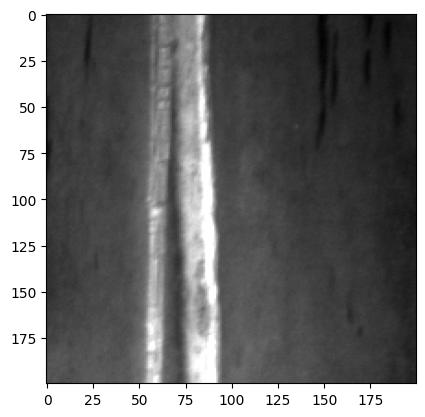

In [ ]:
trial_img = imread(val_path + 'Scratches/Sc_111.bmp')
trial_img = trial_img.reshape(200,200)
plt.imshow(trial_img, cmap = 'gray')

In [ ]:
trial_img = imread(val_path + 'Scratches/Sc_111.bmp')

In [ ]:
trial_img.shape

(200, 200)

In [ ]:
type(trial_img)
trial_img = trial_img.reshape(200,200)

Her bir piksel dizisi için kontrol edip etiketlenmiş görüntünün hatalı olduğunu belirtiyor


In [ ]:
trial_img

array([[ 76,  72,  80, ...,  73,  72,  73],
       [ 80,  78,  82, ...,  73,  69,  73],
       [ 80,  79,  83, ...,  72,  70,  69],
       ...,
       [119, 119, 114, ...,  78,  80,  81],
       [118, 115, 111, ...,  78,  82,  80],
       [118, 114, 112, ...,  77,  80,  80]], dtype=uint8)

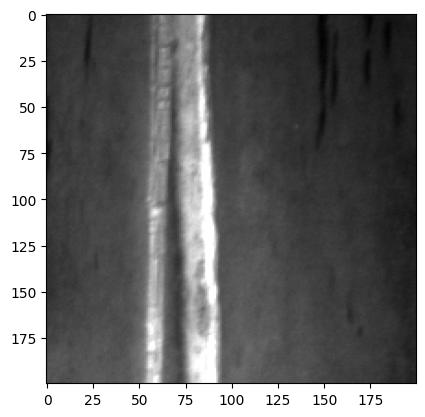

In [ ]:
plt.imshow(trial_img, cmap = 'gray')

#### Resimleri yükleme işlemi


In [ ]:
train_images = train_generator.flow_from_directory(train_path,
                                                   target_size = (200, 200),
                                                   batch_size = 32,
                                                   shuffle = True,
                                                   seed = 42)

Found 1656 images belonging to 6 classes.


In [ ]:
# train generatorü kullanma işlemi

val_images = test_generator.flow_from_directory(val_path,
                                                target_size = (200, 200),
                                                shuffle = False,
                                                seed = 42)

Found 72 images belonging to 6 classes.


In [ ]:
test_images = test_generator.flow_from_directory(test_path,
                                                target_size = (200, 200),
                                                shuffle = False,
                                                seed = 42)

Found 72 images belonging to 6 classes.


In [ ]:
train_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [ ]:
val_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [ ]:
test_images.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

## Modeli oluşturma


### Geri dönüşleri tanımlama işlemi


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print('Eğitim verilerinde %98 doğruluğa ulaşıldı!\n Fazla takmayı önlemek için eğitimi durdurma.')
      self.model.stop_training = True

In [ ]:
my_callback = MyCallback()

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import pytz

my_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d_%m_%Y-%H_%M_%S")

log_dir = os.path.join("/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/tensorboard_logs",
                        my_time)

tensorboard = tf.keras.callbacks.TensorBoard(log_dir)



```
# Bu, kod olarak biçimlendirilmiştir
```

### INCEPTİON V3 MODELİNİ OLUŞTURMA

In [ ]:
MODEL_URL = "https://tfhub.dev/google/imagenet/inception_v3/classification/4"
MODEL_NAME = "InceptionV3_1"
NUM_CLASSES = len(train_images.class_indices)

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

model = Sequential([hub.KerasLayer(MODEL_URL),
                   tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'Adam')

model.build(INPUT_SHAPE)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              23853833  
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 23,859,845
Trainable params: 6,012
Non-trainable params: 23,853,833
_________________________________________________________________


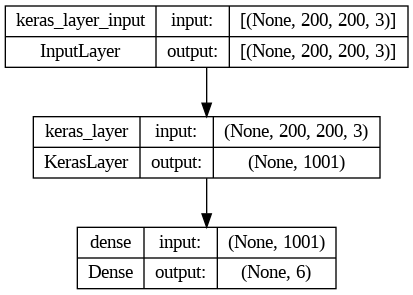

In [ ]:
# Flowchart ile modeli gösterim

tf.keras.utils.plot_model(model,
                          to_file= '/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/' + MODEL_NAME + '_architecture.png',
                          show_shapes=True)

## Modelin GPU testi

In [ ]:
# GPU kullanıp kullanmadığımızı kontrol ediyoruz
print("GPU çalışmaktadır!!") if tf.config.list_physical_devices("GPU") else print("Gpu çalışmamaktadır :(")

GPU çalışmaktadır!!


In [ ]:
# Eğitilecek dönem sayısına karar verme
NUM_EPOCHS = 50 #@param {type:'slider', min:20, max:100,step:10}

In [ ]:
np.random.seed(42)
results = model.fit(train_images,
          epochs = NUM_EPOCHS,
          validation_data = val_images,
          callbacks = [my_callback, early_stop, tensorboard])

Epoch 1/50
52/52 [==============================] - 381s 7s/step - loss: 1.0809 - accuracy: 0.6757 - val_loss: 0.3169 - val_accuracy: 0.8750
Epoch 2/50
52/52 [==============================] - 26s 493ms/step - loss: 0.3352 - accuracy: 0.8877 - val_loss: 0.2512 - val_accuracy: 0.9167
Epoch 3/50
52/52 [==============================] - 25s 476ms/step - loss: 0.2140 - accuracy: 0.9275 - val_loss: 0.2004 - val_accuracy: 0.9306
Epoch 4/50
52/52 [==============================] - 25s 483ms/step - loss: 0.1784 - accuracy: 0.9408 - val_loss: 0.1101 - val_accuracy: 0.9861
Epoch 5/50
52/52 [==============================] - 25s 487ms/step - loss: 0.1750 - accuracy: 0.9402 - val_loss: 0.1617 - val_accuracy: 0.9444
Epoch 6/50
52/52 [==============================] - 25s 473ms/step - loss: 0.1397 - accuracy: 0.9571 - val_loss: 0.1087 - val_accuracy: 0.9722
Epoch 7/50
52/52 [==============================] - 25s 484ms/step - loss: 0.1301 - accuracy: 0.9626 - val_loss: 0.0862 - val_accuracy: 0.9722
E

In [ ]:
model_name = f"{MODEL_NAME}_acc-{results.history['val_accuracy'][-1]:.2f}-{my_time}.hdf5"
model_name

In [ ]:
model_save_path = os.path.join("/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/trained_models",
                         model_name)
model.save(model_save_path)

### Tensorboard kullanarak eğitimi görselleştirme işlemi


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/trained_models/InceptionV3_1_acc-1.00-25_07_2022-12_28_33.hdf5',
                          custom_objects={"KerasLayer":hub.KerasLayer})
model.summary()

In [ ]:
model.evaluate_generator(val_images)

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Datasets/NEU_metal_surface_defects/tensorboard_logs

## Tahminleri Değerlendirme ve Görselleştirme

### Değerlendirme

In [ ]:
model.metrics_names

In [ ]:
# Doğrulama görüntülerinde Kayıp ve Doğruluk
model.evaluate_generator(val_images)

In [ ]:
# Test görüntülerinde Kayıp ve Doğruluk
model.evaluate_generator(test_images)

In [ ]:
# her sınıf için güven olasılıkları verir (doğrulama verileri)
# Veri karıştırma yok
val_pred_probs = model.predict_generator(val_images)

In [ ]:
# Olasılıklardan sınıf indekslerini elde edin (val tahminleri)
val_pred_classes = [np.argmax(x) for x in val_pred_probs]
val_pred_classes[:10]

In [ ]:
val_images.classes[:10]

In [ ]:
# her sınıf için güven olasılıkları verir (test verileri)
# Veri karıştırma yok
test_pred_probs = model.predict_generator(test_images)

In [ ]:
# Olasılıklardan sınıf endekslerini elde edin (test tahminleri)
test_pred_classes = [np.argmax(x) for x in test_pred_probs]
test_pred_classes[:15]

In [ ]:
test_images.classes[:15]

In [ ]:
# her sınıf için güven olasılıkları verir (train_data)
# DİKKAT: VERİLER HER ZAMAN KARIŞTIRILIR
train_pred_probs = model.predict_generator(train_images)

In [ ]:
# Olasılıklardan sınıf indekslerini elde edin (val tahminleri)
train_pred_classes = [np.argmax(x) for x in train_pred_probs]
train_pred_classes[:10]

In [ ]:
# orijinal train görüntülerindeki sınıflar ile tahminle verilen sınıflar farklıdır
# bunun nedeni train verilerini karıştırmamızdır.
train_images.classes[:10]

#### Sınıflandırma raporu ve Karışıklık Matrisi

In [ ]:
# tf.math'den içe aktarılan karışıklık_matrix
from sklearn.metrics import classification_report, confusion_matrix
val_classification_rep = classification_report(val_images.classes, val_pred_classes)
print(val_classification_rep)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
test_classification_repo = classification_report(test_images.classes, test_pred_classes)
print(test_classification_repo)

In [ ]:
conf_mat = confusion_matrix(test_images.classes, test_pred_classes)
print(conf_mat)

#### Gerçek dünya görüntüsü üzerinde tahmin yapmak

In [ ]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img('/content/drive/MyDrive/Datasets/NEU_metal_surface_defects/test/Patches/Pa_1.bmp', target_size = INPUT_SHAPE[1:])

In [ ]:
# plt.imshow(my_image)
my_image

In [ ]:
my_image_array = image.img_to_array(my_image)

In [ ]:
my_image_array[:2]

In [ ]:
type(my_image_array)

In [ ]:
my_image_array.shape

In [ ]:
# 0 ekseninde [reshape() veya np.expand_dims()] başka bir boyut eklememiz gerekiyor
my_image_array = np.expand_dims(my_image_array, axis = 0)
my_image_array.shape

In [ ]:
test_images.class_indices

In [ ]:
# Doğru olan "yamaları" tahmin eder
np.argmax(model.predict(my_image_array))

### Tahminleri görselleştirme

Aşağıda kullanılan 'load_files()' işlevi, '['data', 'filenames', 'target_names', 'hedef', 'DESCR']'yi sözlük olarak yükler.
Yüklenen veriler/görüntüler "bayt" biçimindedir ve bu nedenle şunları yapmamız gerekir:
* numpy dizi formatına dönüştürün.
    -  Using OpenCV: `cv2.imdecode(np.frombuffer(imgs[0], np.uint8), -1)`
    -  Using Pillow: `np.array(Image.open(io.BytesIO(image_bytes)))`
*  kullanarak dosya adlarını kullanarak görüntüleri okuyun `load_img()`

**Tahmin görselleştirme bölümü için Değişken Açıklaması:**
- **X_test** = test görüntüleri
- **y_test** = gerçek test etiketleri
- **class_labels** = sınıf adları
- **y_preds** = X_test görüntülerinin tahmin olasılıkları

In [ ]:
from sklearn.datasets import load_files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
data = load_files(test_path)

In [ ]:
data.keys()

In [ ]:
imgs = data['data']
type(imgs[0])

In [ ]:
# kullanarak görüntüleri yükleyin `load_img()`
img = img_to_array(load_img(data['filenames'][0]))
# img
type(img), img.shape

In [ ]:
#  Pillow kullanarak görüntüleri yükleyin:
from PIL import Image
import io
img = np.array(Image.open(io.BytesIO(imgs[0])))
# plt.imshow(img)
type(img), img.shape

In [ ]:
#  OpenCV kullanarak görüntüleri yükleyin
import cv2
img = cv2.imdecode(np.frombuffer(imgs[0], np.uint8), 3)
type(img), img.shape

In [ ]:
# Veri kümesini yükleme işlevi
def load_dataset(path):
  '''

  Girdi olarak wach sınıfının alt klasörlerini içeren klasörün yolunu alır.
  görüntüleri (numpy dizisi olarak), target_labels, file_names ve class_labels döndürür
  '''
  data = load_files(path)
  imgs = data['data']
  file_names = np.array(data['filenames'])
  target_labels = np.array(data['target'])
  class_labels = np.array(data['target_names'])
  images_arr = []
  for img in imgs:
    images_arr.append(cv2.imdecode(np.frombuffer(img, np.uint8), 3))
  return np.array(images_arr), target_labels, file_names, class_labels



In [ ]:
X_test, y_test, file_names, class_labels = load_dataset(test_path)

In [ ]:
plt.imshow(X_test[0])

In [ ]:
X_test.shape

In [ ]:
y_test[:10], class_labels

Aynı şeyi train seti için de yaptığımız gibi test seti için görüntü piksel değerlerini normalleştirin

In [ ]:
# test görüntülerini normalleştir
X_test = X_test.astype('float32')/255
np.min(X_test), np.max(X_test)

In [ ]:
y_preds = model.predict(X_test)
class_labels, test_images.class_indices

In [ ]:
# Test görüntüleri üzerinde Tahmin Yapın
y_preds = model.predict(X_test) # tahmin olasılıkları

In [ ]:
# Test görüntülerinin Rastgele Örneğinin, tahmin edilen ve gerçek etiketlerinin çizilmesi
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_preds[idx])
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(class_labels[pred_idx], class_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
# Karışıklık matrisi için ısı haritası
import seaborn as sns
sns.heatmap(conf_mat, annot = True, cmap = 'Blues')

In [ ]:
def plot_pred_conf(pred_probs, labels, n=1):
  """
  Plots prediction confidences for each class along with the truth label for a sample n.
  """
  pred_prob = pred_probs[n]

  # Öngörülen ve doğruluk etiketini alın
  pred_label = class_labels[(np.argmax(pred_prob))]
  true_label = class_labels[labels[n]]

  # Tahmin güven endekslerini sıralayın
  sorted_pred_indexes = pred_prob.argsort()[::-1]
  # Tahmin güven değerlerini bulun
  sorted_pred_values = pred_prob[sorted_pred_indexes]
  # Tahmin etiketlerini bulun
  sorted_pred_labels = class_labels[sorted_pred_indexes]

  # Kurulum planı
  plot = plt.bar(np.arange(len(sorted_pred_labels)),
                     sorted_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(sorted_pred_labels)),
             labels=sorted_pred_labels,
             )#rotation="vertical")
  plt.tight_layout()
  # Gerçek etiketin rengini değiştir
  plot[np.argmax(sorted_pred_labels == true_label)].set_color("green" if pred_idx == true_idx else "red")


In [ ]:
plot_pred_conf(y_preds, y_test, 20)

In [ ]:
plot_pred_conf(val_pred_probs,val_images.classes, 20) # Değerlendirme 1'deki değişkenler kullanıldı

In [ ]:
def plot_pred(pred_probs, images, labels, n = 1, class_labels = class_labels):
  """
  Takes prediction probabilities, images and true labels as input.
  n: takes the index of the image to display
  Displays the `prediction probability`, `predicted label`, `true label` and `image`
  on the same plot for the given index.
  Also displays bargraph showing `prediction confidence` for each class.
  """
  # Plot tahmin olasılığı, tahmin edilen etiket, gerçek etiket ve görüntü
  max_prob = np.max(pred_probs[n]) * 100
  pred_label = class_labels[(np.argmax(pred_probs[n]))]
  true_label = class_labels[labels[n]]
  image = images[n]

  if (pred_label == true_label):
    colour = 'green'
  else:
    colour = 'red'

  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.title(f'pred_prob: {max_prob:.2f} \n pred_label: {pred_label} \n truth_label: {true_label}',
            color = colour)
  plt.axis('off')

  # Her sınıf için tahmin güvenini gösteren grafik çubuk grafiği
  plt.subplot(1,2,2)
  plot_pred_conf(pred_probs, labels, n)
  plt.tight_layout()


In [ ]:
plot_pred(y_preds, X_test, y_test,20)

In [ ]:

def plot_multiple_images (images, labels, pred_probs, class_labels = class_labels, num_rows = 3, num_cols = 2):
  """
  A function to check predictions on a `num_rows * num_cols` number of random images.
  Shows the `prediction probability`, `predicted label`, `true label`, `image`
  and bargraph showing `prediction confidence` for each class.
  """
  num_images = num_rows*num_cols
  plt.figure(figsize=(5*2*num_cols, 5*num_rows))

  for i, idx in enumerate(np.random.choice(images.shape[0], size=num_images, replace=False)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)


    max_prob = np.max(pred_probs[idx]) * 100
    pred_label = class_labels[(np.argmax(pred_probs[idx]))]
    true_label = class_labels[labels[idx]]
    image = images[idx]
    if (pred_label == true_label):
      colour = 'green'
    else:
      colour = 'red'
    plt.imshow(image)
    plt.title(f'pred_prob: {max_prob:.2f} \n pred_label: {pred_label} \n truth_label: {true_label}',
              color = colour)
    plt.axis('off')

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(pred_probs, labels, n=idx)
  plt.tight_layout(h_pad=1.0)
  plt.show()

In [ ]:
plot_multiple_images(X_test, y_test, y_preds, class_labels)

### Yanlış sınıflandırılmış verilerin incelenmesi

In [ ]:
# yanlış sınıflandırılmış test verileri
misclassified_test_indices = [i for i in range(len(y_test)) if y_test[i] != np.argmax(y_preds[i])]
misclassified_test_indices

In [ ]:
# Değerlendirme 1 değişken kullanıldı
misclassified_val_indices = [i for i in range(len(val_pred_classes)) if val_images.classes[i] != val_pred_classes[i]]
misclassified_val_indices

In [ ]:
X_test[0].shape

In [ ]:
def show_misclassified(images, labels, pred_probs,misclassified_indices, class_labels = class_labels):
  """
  A function to visualize the misclassified data.
  Uses `plot_pred()` function to display
  the `prediction probability`, `predicted label`, `true label`, `image`
  and bargraph showing `prediction confidence` for each class of misclassified data.
  """
  for i in misclassified_indices:
    plot_pred(pred_probs, images, labels, n= i, class_labels=class_labels)

In [ ]:
# show_misclassified(X_test, val_images.classes, val_pred_probs, misclassified_val_indices)
show_misclassified(X_test, y_test, y_preds, misclassified_test_indices)

Son
